In [544]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

from dataset_load import path as dataset_path

First we need to import the dataset.


In [545]:
data_raw = pd.read_csv(dataset_path + "\data\creditcard_csv.csv")

strip_then_int = lambda s: int(s.replace("'", ""))

data_raw['Class'] = data_raw['Class'].apply(strip_then_int)

data_raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [546]:
## Preprocessing the data

from sklearn.preprocessing import StandardScaler

data_raw['Amount'] = StandardScaler().fit_transform(data_raw[['Amount']])
data_raw['Time'] = StandardScaler().fit_transform(data_raw[['Time']])

X = data_raw.iloc[:, :-1]
y = data_raw.iloc[:, -1]

Split the dataset to 80:20 ratio of train and test datasets

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

**Visualization**

We will visualize the whole data set as opposed to just the X_train or just X_test (this will give us better insight to the whole data not just the training set)

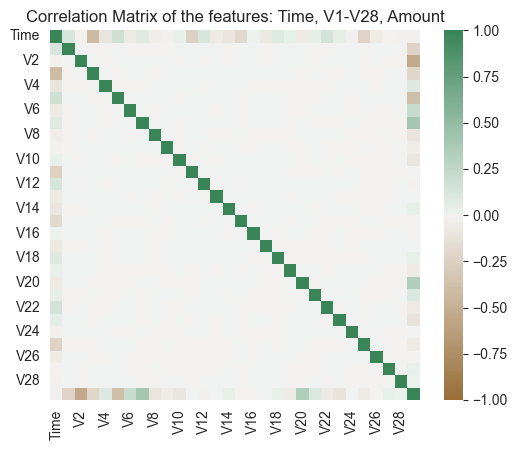

In [548]:
corr_matrix = data_raw.iloc[:, :-1].corr()      ## without the 'Class' column

axis_corr = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    square=True
)

plt.title("Correlation Matrix of the features: Time, V1-V28, Amount")
plt.show()

Seems like the features: 'Time' and 'Amount' have correlation with the features V1-V28,
all the other features don't have correlation between them

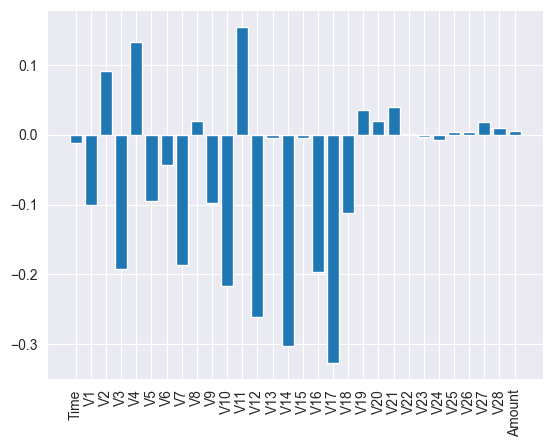

In [549]:
corr_matrix_with_target = data_raw.corrwith(data_raw["Class"]).drop('Class') ## drop 'Class' because corr is 1

plt.bar(corr_matrix_with_target.index, corr_matrix_with_target)
plt.xticks(rotation=90)
plt.show()

|**Applying Naive Bayes**
- The most simple algorithm and has high interoperability
- Naive Bayes assumes independence between features (That's why it's 'Naive')
- Bernoulli assumes binary features (might binarize if not binary already)

In [550]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

bnb = BernoulliNB()

In [551]:
## util functions

def print_report(y_true, y_pred):
    """
    This function prints the classification report.
    :param y_true:
    :param y_pred:
    :return:
    """
    print(classification_report(y_true, y_pred))

    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True)

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    plt.show()

def print_roc(y_true, y_probs):
    """
    This function prints the ROC curve & prints the ROC AUC score to the console.
    :param y_true:
    :param y_probs:
    :return:
    """
    # print(f"AUC-ROC Score: {roc_auc_score(y_test, y_probs)}")

    # Plotting the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Now we will evaluate the prediction, we will use precision & recall as the main metric because the dataset is highly imbalanced

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.66      0.73       148

    accuracy                           1.00     85443
   macro avg       0.91      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



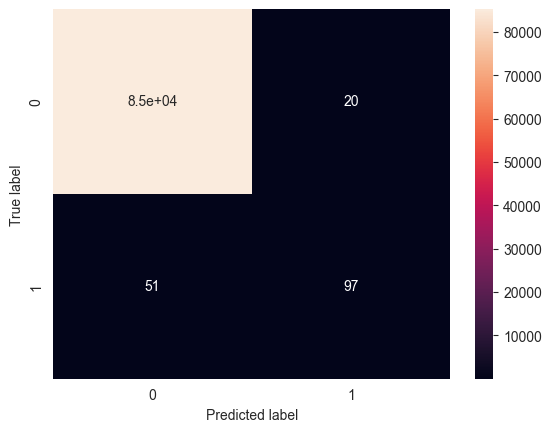

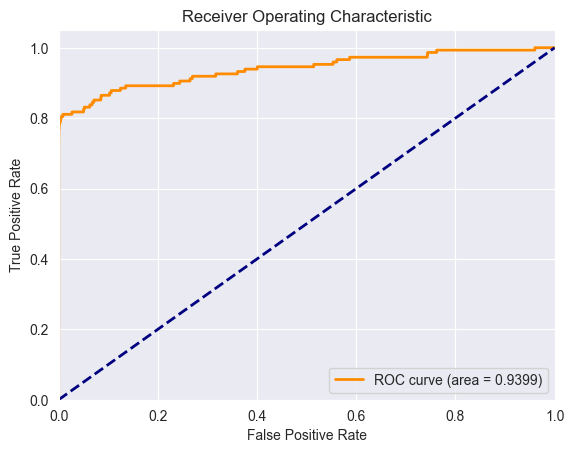

In [552]:
y_pred = bnb.fit(X_train, y_train).predict(X_test)
y_probs = bnb.predict_proba(X_test)[:, 1]

print_report(y_test, y_pred)
print_roc(y_test, y_probs)

**Results**
- Accuracy is very high - BUT it doesn't tell us whether the model is good or not because the dataset is so unbalanced
- Precision & Recall -

**Train a Logistic Regression Model:**
Now we will train a Logistic Regression model using our resampled training data. We use class_weight='balanced' to handle class imbalance, ensuring the model pays more attention to fraud cases.


In [553]:
# # Scale train and test features
# standard_scaler = StandardScaler()
# X_train_scaled = standard_scaler.fit_transform(X_train)
# X_test_scaled = standard_scaler.transform(X_test)

In [554]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [555]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_res, y_res)

LogisticRegression(class_weight='balanced', max_iter=1000)

**Make Predictions on the Test Set:**
Next, we use the trained model to predict fraud on the test data. We also obtain probability scores for each prediction, which are useful for visualizing ROC and precision-recall curves.

In [556]:
# Predict class labels
y_pred = lr.predict(X_test)
# Predict probability scores (for evaluation curves)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

**Evaluate Model Performance (Scores and Reports):**
Let's check how well our model performs. We print the classification report, ROC AUC score, and the confusion matrix to understand its strengths and weaknesses.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



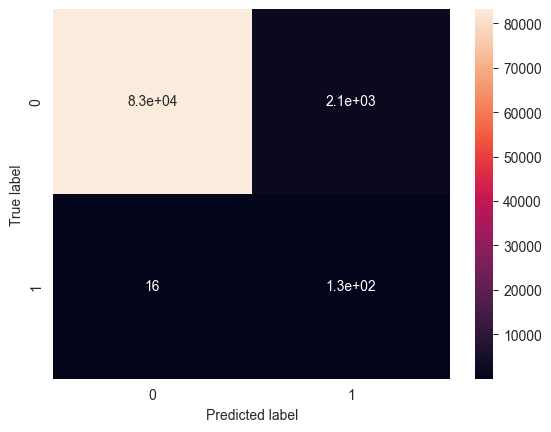

In [557]:
# Print performance metrics
print_report(y_test, y_pred)

**Visualize the Results:**
Finally, let's visualize the model's performance using the ROC curve and the Precision-Recall curve. These plots help us understand the trade-off between correctly detecting fraud and avoiding false alarms.


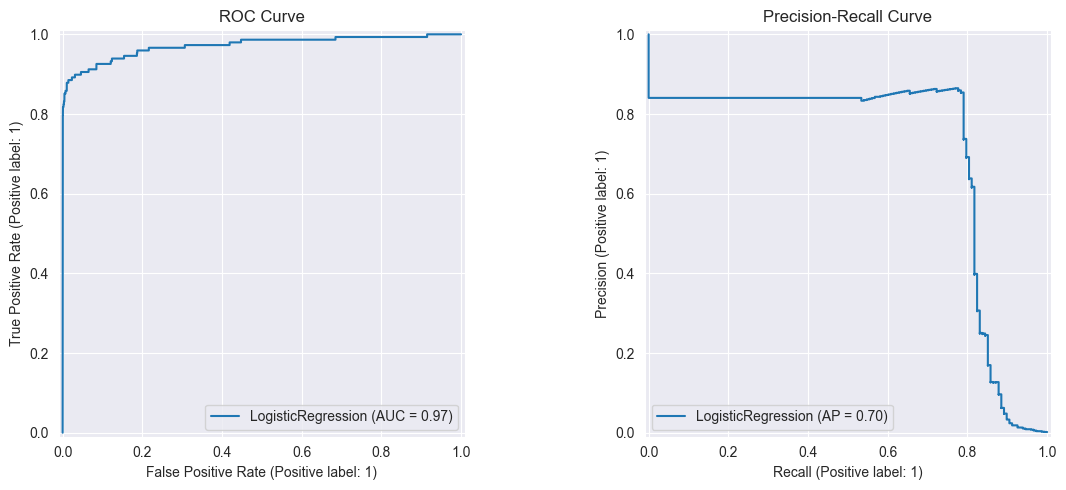

In [558]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC Curve
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=axes[0])
axes[0].set_title('ROC Curve')

# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(lr, X_test, y_test, ax=axes[1])
axes[1].set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

In [559]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

import warnings

In [578]:
class_labels = np.unique(y_train)

weights = compute_class_weight('balanced', classes=class_labels, y=y_train)
custom_weights = {0: weights[0] * 0.01, 1: weights[1] * 1.1}


ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_jobs=-1,
                                      n_estimators=500,
                                      criterion='entropy',
                                      class_weight=custom_weights)),

        ('lr', LogisticRegression(class_weight=custom_weights)),

        ('xgb', XGBClassifier(scale_pos_weight=custom_weights[0] / custom_weights[1])),
    ],
    voting='soft'
)


warnings.filterwarnings('ignore')

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.98      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



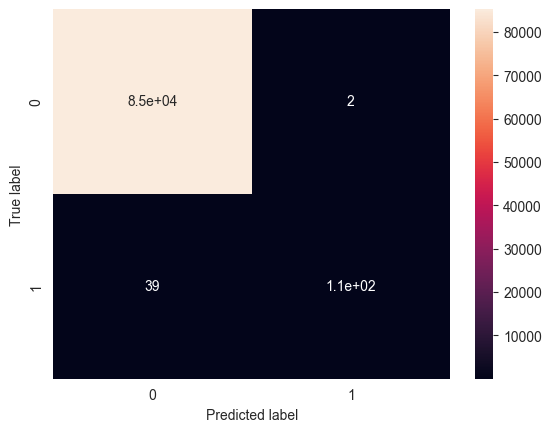

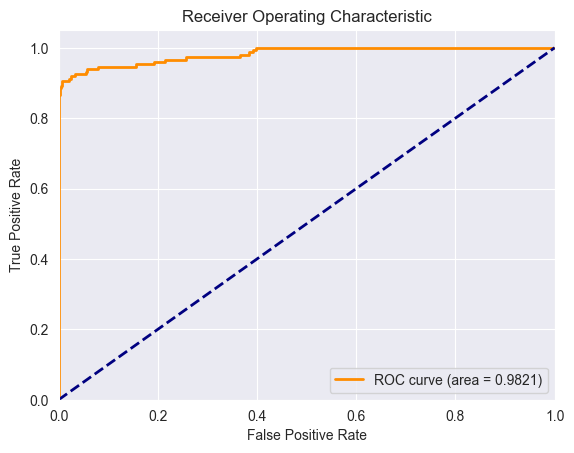

In [579]:
print_report(y_test, y_pred)
print_roc(y_test, y_probs)

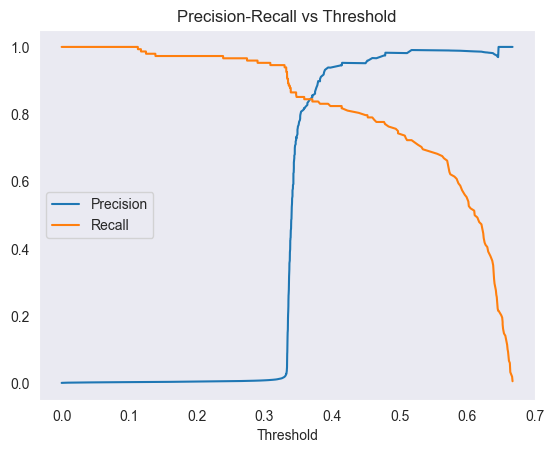

In [580]:
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.grid()
plt.show()

In [640]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'hidden_layer_sizes': [(16, 8), (10,), (16,), (10, 5), (20, 40), (10, 8),
                           (50,), (100,), (100, 50), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],  # 'sgd' optional but slower
    'alpha': [1e-6 ,1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'learning_rate_init': [0.0001 ,0.001, 0.01, 0.1],
    'momentum': [0. , 0.9, 0.99, 0.999, 0.9999],
    'batch_size': [32, 64, 128, 256, 512, 1024, 'auto']
}


mlpc = MLPClassifier(max_iter=200,
                     early_stopping=True)  # handle imbalance

search = RandomizedSearchCV(
    mlpc, param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

search.fit(X_train, y_train)

best = search.best_estimator_
best_params = search.best_params_       ## best params: [{'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (10, 8), 'batch_size': 64, 'alpha': 0.001, 'activation': 'tanh'}]


Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best params: {'solver': 'adam', 'momentum': 0.9, 'learning_rate_init': 0.0001, 'hidden_layer_sizes': (100, 50), 'batch_size': 128, 'alpha': 0.0001, 'activation': 'relu'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



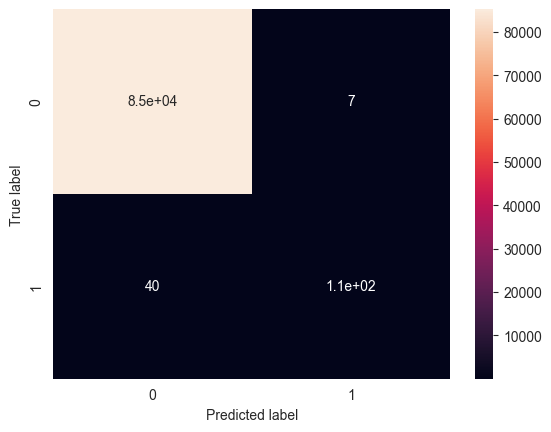

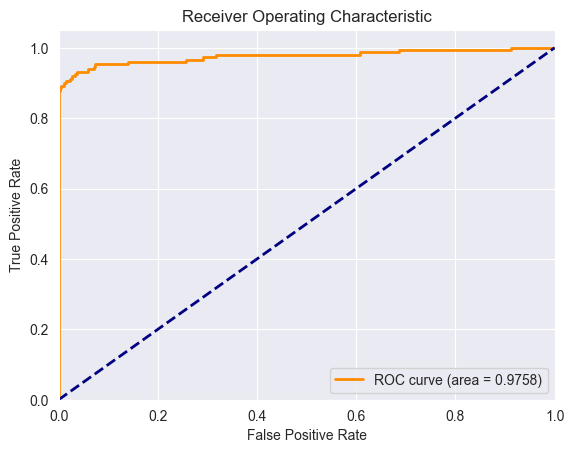

In [641]:
y_pred = best.predict(X_test)
y_probs = best.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
print(f"Best params: {best_params}")
print_report(y_test, y_pred)
print_roc(y_test, y_probs)

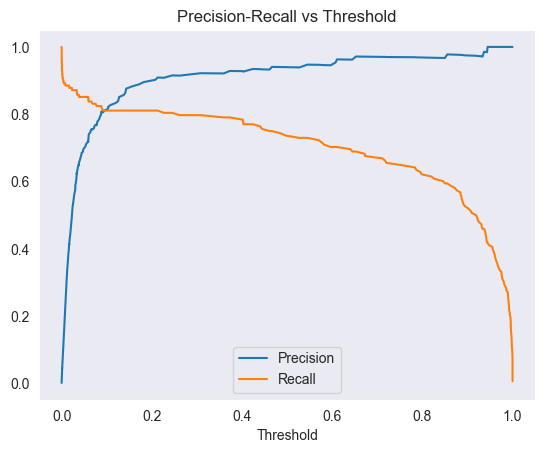

In [642]:
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.grid()
plt.show()